<a href="https://colab.research.google.com/github/prashantloni9164/Support_Vector_machine/blob/main/Support_Vector_Machine_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
df1=load_iris()

In [214]:
df1.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [215]:
df1.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [216]:
df=pd.DataFrame(df1.data, columns=df1.feature_names)

In [217]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [218]:
df['target']=df1.target

In [219]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [220]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [221]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [222]:
df['flower name']=df.target.apply(lambda x: df1.target_names[x])

In [223]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [224]:
  df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


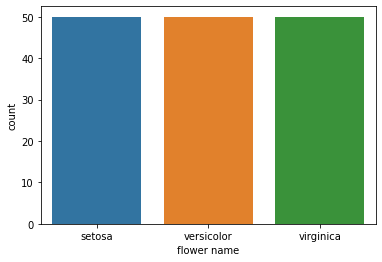

In [225]:
sns.countplot(x='flower name', data=df)

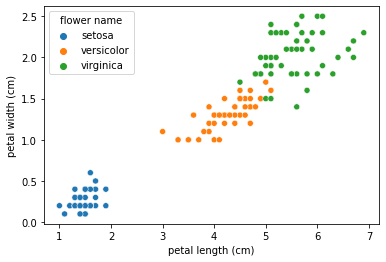

In [226]:
sns.scatterplot(x='petal length (cm)',y='petal width (cm)',hue='flower name', data=df);

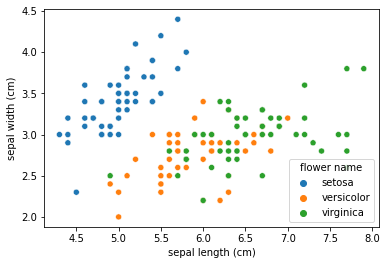

In [262]:
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)',hue='flower name', data=df);

In [227]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


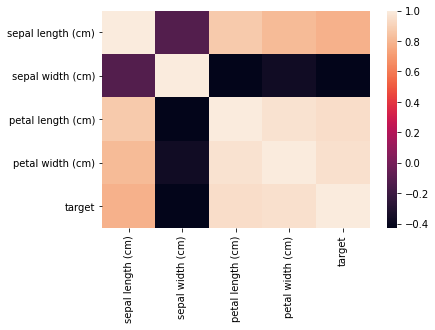

In [228]:
sns.heatmap(df.corr())

In [229]:
df.groupby('flower name').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
flower name,,,,,
setosa,5.006,3.428,1.462,0.246,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


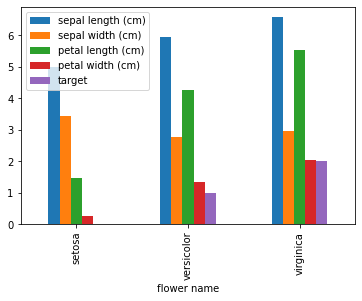

In [231]:
df.groupby('flower name').mean().plot.bar();

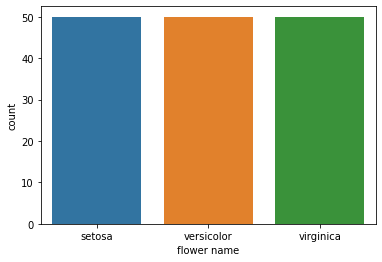

In [233]:
sns.countplot(x='flower name', data=df);

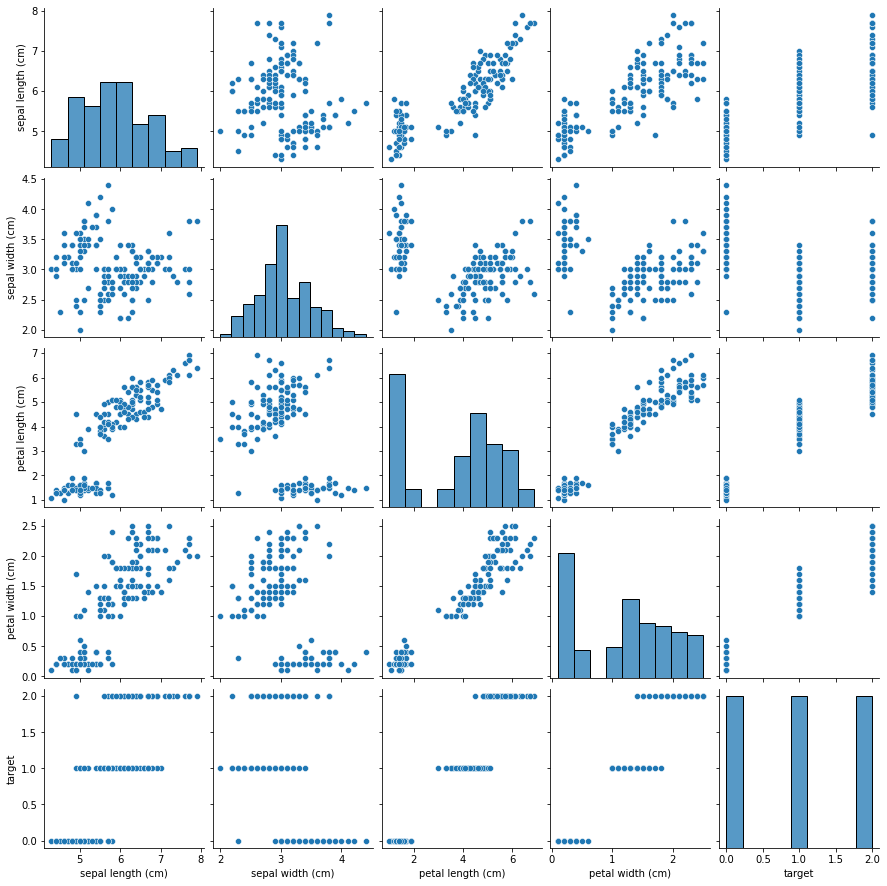

In [234]:
sns.pairplot(df)

# Model builting

In [235]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [236]:
x=df.drop(['target','flower name'], axis=1)

In [248]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [238]:
y=df['target']

In [239]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [250]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [251]:
from sklearn.svm import SVC
model=SVC()

In [252]:
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [253]:
model.score(x_test,y_test)

1.0

#1. Regularisation(c)

In [254]:
model=SVC(C=1)
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

In [255]:
model=SVC(C=10)
model.fit(x_train,y_train)
model.score(x_test,y_test)

1.0

# 2. Gamma

In [261]:
model_g = SVC(gamma=10)
model_g.fit(x_train, y_train)
model_g.score(x_test, y_test)

0.9473684210526315

#3. Kernel

In [260]:

model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(x_train, y_train)
model_g.score(x_test, y_test)

0.9473684210526315